In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_excel("exam_dtl_merge1_t.xlsx")

In [3]:
data

,oi_no,order_date,d20,reg_no,26453-1,718-7,20570-8,26478-8,2951-2,2019-8,...,22357-8,7918-6,5191-2,13954-3,2857-1,32637-1,41604-0,X11004-1,X11004-2,51880-3
0,59660564,2021/1/1,I959,657612,L,L,L,L,L,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN
1,59659819,2021/1/1,R4182,986613,L,L,L,Y,Y,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59660636,2021/1/1,A419,961512,Y,Y,Y,L,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59660685,2021/1/2,K5900,129806,Y,L,Y,H,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59661202,2021/1/2,I2510,978961,L,L,L,L,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,59659263,2021/1/8,O0993,278271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,59670357,2021/1/8,M109,909705,NaN,Y,NaN,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,59661909,2021/1/5,K250,66263,Y,Y,Y,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,59670710,2021/1/8,E1121,308143,Y,Y,Y,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y


In [4]:
data.drop("oi_no",axis=1,inplace=True)
data.drop("order_date",axis=1,inplace=True)
data.fillna(value="0",inplace=True)
data=data.replace("Y","1000")
data=data.replace("L","-1000")
data=data.replace("D","-1000")
data=data.replace("A","-1000")
data=data.replace("I","-1000")
data=data.replace("H","-1000")
data=data.replace("DL","-1000")
data=data.replace("DH","-1000")
data

,d20,reg_no,26453-1,718-7,20570-8,26478-8,2951-2,2019-8,1960-4,1925-7,...,22357-8,7918-6,5191-2,13954-3,2857-1,32637-1,41604-0,X11004-1,X11004-2,51880-3
0,I959,657612,-1000,-1000,-1000,-1000,-1000,-1000,-1000,-1000,...,0,0,0,0,0,0,0,1000,1000,0
1,R4182,986613,-1000,-1000,-1000,1000,1000,-1000,-1000,-1000,...,0,0,0,0,0,0,0,0,0,0
2,A419,961512,1000,1000,1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,K5900,129806,1000,-1000,1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I2510,978961,-1000,-1000,-1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,O0993,278271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,M109,909705,0,1000,0,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,K250,66263,1000,1000,1000,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,E1121,308143,1000,1000,1000,0,0,0,0,0,...,0,0,0,0,0,0,0,1000,1000,1000


In [5]:
#定義d20的編碼器與解碼器
def encode_df(dataframe):
    le = LabelEncoder()
    dataframe["d20"] = le.fit_transform(dataframe["d20"])
    return dataframe

In [6]:
#encode the DataFrame
encode_df(data)

,d20,reg_no,26453-1,718-7,20570-8,26478-8,2951-2,2019-8,1960-4,1925-7,...,22357-8,7918-6,5191-2,13954-3,2857-1,32637-1,41604-0,X11004-1,X11004-2,51880-3
0,22,657612,-1000,-1000,-1000,-1000,-1000,-1000,-1000,-1000,...,0,0,0,0,0,0,0,1000,1000,0
1,57,986613,-1000,-1000,-1000,1000,1000,-1000,-1000,-1000,...,0,0,0,0,0,0,0,0,0,0
2,2,961512,1000,1000,1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31,129806,1000,-1000,1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19,978961,-1000,-1000,-1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,49,278271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,40,909705,0,1000,0,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,30,66263,1000,1000,1000,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,8,308143,1000,1000,1000,0,0,0,0,0,...,0,0,0,0,0,0,0,1000,1000,1000


In [7]:
data.dtypes

d20          int32
reg_no       int64
26453-1     object
718-7       object
20570-8     object
             ...  
32637-1     object
41604-0     object
X11004-1    object
X11004-2    object
51880-3     object
Length: 158, dtype: object

In [8]:
data=data.astype("int32") #把DataFrame都轉int32

In [9]:
data.dtypes

d20         int32
reg_no      int32
26453-1     int32
718-7       int32
20570-8     int32
            ...  
32637-1     int32
41604-0     int32
X11004-1    int32
X11004-2    int32
51880-3     int32
Length: 158, dtype: object

In [10]:
pca=PCA(n_components=3)
pca.fit(data).transform(data)

array([[ 4.15707205e+04,  2.50826622e+03,  6.07440554e+02],
       [-2.87428794e+05,  2.08702181e+03,  4.98290885e+02],
       [-2.62326819e+05,  2.18597123e+03,  1.69156258e+03],
       [ 5.69378676e+05,  2.18591075e+03, -2.13313430e+03],
       [-2.79777181e+05,  1.69348096e+03, -8.81813880e+02],
       [ 3.81751990e+05,  2.79117524e+03, -8.64951619e+02],
       [ 6.82959778e+05,  1.14109647e+03,  1.41764273e+03],
       [-1.91327310e+05,  5.37323456e+02,  3.14443632e+03],
       [-2.81084308e+05,  1.57093412e+02, -9.81258780e+01],
       [-2.20950769e+05,  8.57762017e+02,  6.86009896e+02],
       [ 3.69396306e+05,  5.77286939e+02,  3.63481551e+01],
       [-3.84811693e+04,  1.71890928e+03, -3.69561367e+02],
       [ 3.79591503e+05,  1.60213466e+03,  2.54954506e+03],
       [-2.02765071e+05,  4.02526407e+03, -2.05714007e+03],
       [ 1.94309412e+04,  2.05836708e+03,  2.21650082e+02],
       [-2.47759930e+05,  1.75592665e+03,  5.59111854e+02],
       [-2.81627099e+05,  1.16435711e+03

In [11]:
pca.n_components_

3

In [12]:
pca.explained_variance_ratio_

array([9.99780291e-01, 3.43581654e-05, 2.44935549e-05])

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99978029, 0.99981465, 0.99983914])

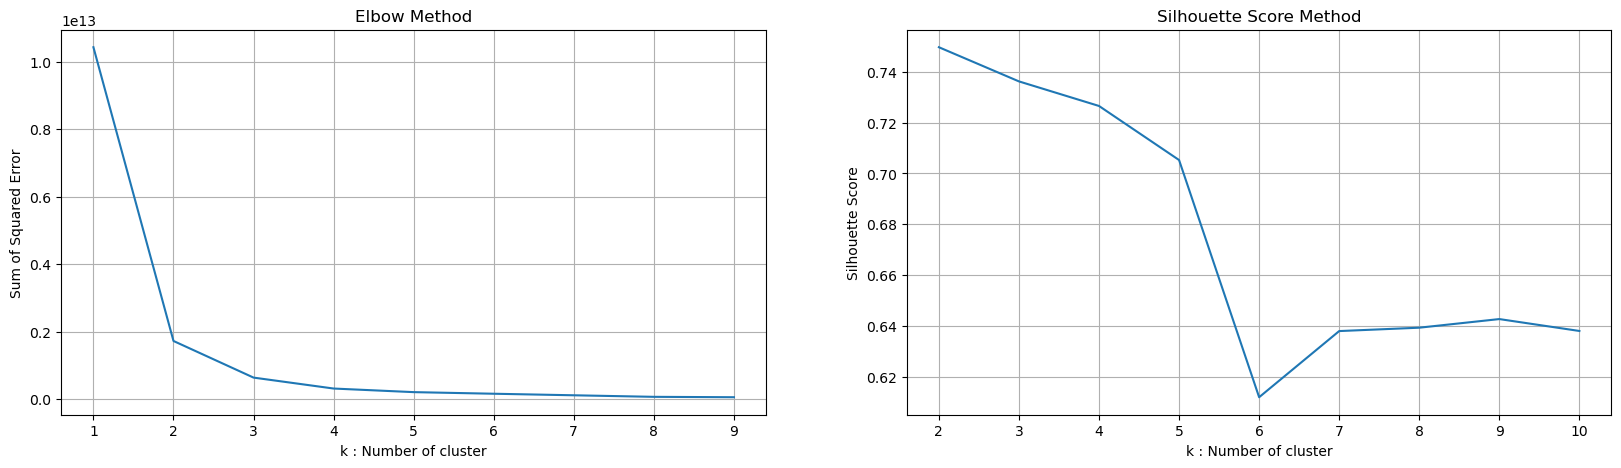

In [14]:
sse = {}; sil = []; kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method 
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil)
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

In [15]:
kmean_3 = KMeans(n_clusters = 3,max_iter = 1000)
kmean_3.fit_predict(data)
kmean_3_labels = kmean_3.labels_

kmean_4 = KMeans(n_clusters = 4,max_iter = 1000)
kmean_4.fit_predict(data)
kmean_4_labels = kmean_4.labels_
print("這是分3群的labels:",kmean_3_labels) #產出的labels都是list
print("這是分4群的labels:",kmean_4_labels) #產出的labels都是list

這是分3群的labels: [2 1 1 0 1 0 0 1 1 1 0 2 0 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 0 1 0 0 2 2 2
 2 0 0 0 1 1 1 1 0 0 2 1 1 2 2 2 1 1 1 0 2 1 1 2 1 2 1 1 1 1 0 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 2 2 1 1 0 2 2 1 1 1 2 1 0 0 0 2 0 1 0 0 1]
這是分4群的labels: [0 1 1 3 1 2 3 1 1 1 2 0 2 1 0 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 3 1 3 3 0 0 0
 2 3 2 3 1 1 1 1 2 2 2 1 1 0 0 0 1 1 1 3 0 1 1 0 1 0 1 1 1 1 3 3 1 3 2 1 1
 1 1 2 1 1 1 1 1 0 0 1 1 2 0 0 1 1 1 0 1 3 3 2 0 2 1 3 2 1]


Text(0.5, 1.0, 'cluster4')

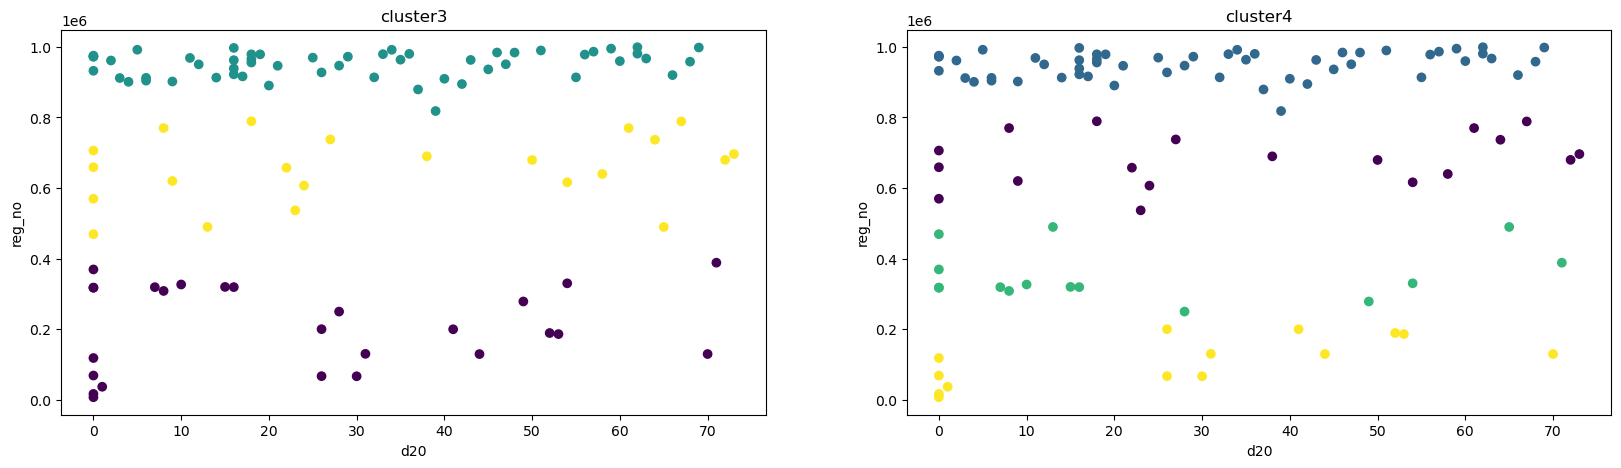

In [16]:
fig,axes= plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

axes[0].scatter(data.iloc[:, 0], data.iloc[:, 1], c = kmean_3_labels)
axes[0].set(xlabel="d20",ylabel="reg_no")
axes[0].set_title("cluster3")

axes[1].scatter(data.iloc[:, 0], data.iloc[:, 1], c = kmean_4_labels)
axes[1].set(xlabel="d20",ylabel="reg_no")
axes[1].set_title("cluster4")

In [17]:
#把3群的效果用出來
for cluster in range(3):
    print('cluster: ', cluster)
    labels=np.where(kmean_3_labels == cluster)
    print(labels)

cluster:  0
(array([  3,   5,   6,  10,  12,  30,  32,  33,  38,  39,  40,  45,  46,
        56,  67,  68,  70,  71,  76,  86,  94,  95,  96,  98, 100, 101],
      dtype=int64),)
cluster:  1
(array([  1,   2,   4,   7,   8,   9,  13,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  25,  27,  28,  29,  31,  41,  42,  43,  44,  48,
        49,  53,  54,  55,  58,  59,  61,  63,  64,  65,  66,  69,  72,
        73,  74,  75,  77,  78,  79,  80,  81,  84,  85,  89,  90,  91,
        93,  99, 102], dtype=int64),)
cluster:  2
(array([ 0, 11, 14, 24, 26, 34, 35, 36, 37, 47, 50, 51, 52, 57, 60, 62, 82,
       83, 87, 88, 92, 97], dtype=int64),)


In [18]:
#把ˋ群的效果用出來
for cluster in range(4):
    print('cluster: ', cluster)
    labels=np.where(kmean_4_labels == cluster)
    print(labels)

cluster:  0
(array([ 0, 11, 14, 26, 34, 35, 36, 50, 51, 52, 57, 60, 62, 82, 83, 87, 88,
       92, 97], dtype=int64),)
cluster:  1
(array([  1,   2,   4,   7,   8,   9,  13,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  25,  27,  28,  29,  31,  41,  42,  43,  44,  48,
        49,  53,  54,  55,  58,  59,  61,  63,  64,  65,  66,  69,  72,
        73,  74,  75,  77,  78,  79,  80,  81,  84,  85,  89,  90,  91,
        93,  99, 102], dtype=int64),)
cluster:  2
(array([  5,  10,  12,  24,  37,  39,  45,  46,  47,  71,  76,  86,  96,
        98, 101], dtype=int64),)
cluster:  3
(array([  3,   6,  30,  32,  33,  38,  40,  56,  67,  68,  70,  94,  95,
       100], dtype=int64),)


In [19]:
#在DataFrame後面增加cluster_3和cluster_4欄位
data['cluster_3'] = kmean_3_labels
data['cluster_4'] = kmean_4_labels

In [20]:
cluster_3_0=data[data["cluster_3"] == 0]
cluster_3_1=data[data["cluster_3"] == 1]
cluster_3_2=data[data["cluster_3"] == 2]

cluster_4_0=data[data["cluster_4"] == 0]
cluster_4_1=data[data["cluster_4"] == 1]
cluster_4_2=data[data["cluster_4"] == 2]
cluster_4_3=data[data["cluster_4"] == 3]

## 以分3群，labels為0的筆數為範例

In [21]:
cluster_3_0 

,d20,reg_no,26453-1,718-7,20570-8,26478-8,2951-2,2019-8,1960-4,1925-7,...,5191-2,13954-3,2857-1,32637-1,41604-0,X11004-1,X11004-2,51880-3,cluster_3,cluster_4
3,31,129806,1000,-1000,1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,317432,1000,1000,1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,16227,1000,1000,1000,1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,3
10,54,329790,1000,-1000,1000,-1000,-1000,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12,15,319594,1000,1000,1000,1000,-1000,0,0,0,...,0,0,0,0,0,0,0,0,0,2
30,44,129169,-1000,-1000,-1000,-1000,-1000,0,0,0,...,0,0,0,0,0,0,0,0,0,3
32,1,36480,-1000,-1000,-1000,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
33,0,6834,1000,1000,1000,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
38,53,185812,1000,1000,1000,1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,3
39,16,319034,1000,-1000,-1000,-1000,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## 各集群的DataFrame，以下會很多敬請見諒QQ，我們以分3群的結果來看，其實根據分群的結果可以將它各自存成csv or excel。
## 另外可以從中去看d20和reg_no的關係

In [22]:
cluster_3_0_df=pd.DataFrame({"d20":cluster_3_0["d20"],"reg_no":cluster_3_0["reg_no"]}) #第0群的DataFrame，最旁邊的index不用管他
cluster_3_0_df=cluster_3_0_df.sort_values(by="d20",ascending=False) #降冪排序
cluster_3_0_df

,d20,reg_no
45,71,388232
94,70,129302
10,54,329790
38,53,185812
40,52,188846
98,49,278271
30,44,129169
68,41,199496
3,31,129806
100,30,66263


In [23]:
cluster_3_1_df=pd.DataFrame({"d20":cluster_3_1["d20"],"reg_no":cluster_3_1["reg_no"]}) #第1群的DataFrame，最旁邊的index不用管他
cluster_3_1_df=cluster_3_1_df.sort_values(by="d20",ascending=False) #降冪排序
cluster_3_1_df

,d20,reg_no
19,69,998273
41,68,958163
9,66,920136
93,63,967093
84,62,999125
16,62,980812
91,60,959782
78,59,995112
1,57,986613
79,56,978283


In [24]:
cluster_3_2_df=pd.DataFrame({"d20":cluster_3_2["d20"],"reg_no":cluster_3_2["reg_no"]}) #第0群的DataFrame，最旁邊的index不用管他
cluster_3_2_df=cluster_3_2_df.sort_values(by="d20",ascending=False) #降冪排序
cluster_3_2_df

,d20,reg_no
57,73,696184
14,72,679753
26,67,788678
37,65,489542
52,64,736808
35,61,769881
36,58,639739
34,54,616226
82,50,679501
97,38,689743
